# Problem description


In [92]:
from IPython.display import Image
Image(url='https://s3.amazonaws.com/drivendata-public-assets/nepal-quake-bm-2.JPG')

# Features

- geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.

- count_floors_pre_eq (type: int): number of floors in the building before the earthquake.

- age (type: int): age of the building in years.

- area_percentage (type: int): normalized area of the building footprint.

- height_percentage (type: int): normalized height of the building footprint.

- land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.

- foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.

- roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.

- ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.

- other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.

- position (type: categorical): position of the building. Possible values: j, o, s, t.

- plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.

- has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.

- has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar Stone.

- has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.

- has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.

- has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar- Brick.

- has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.

- has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.

- has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.

- has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.

- has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.

- has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.

- legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.

- count_families (type: int): number of families that live in the building.

- has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.

- has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.

- has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.

- has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.

- has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.

- has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.

- has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.

- has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.

- has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.

- has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.

- has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.

In [93]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sbs
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


In [94]:
df=pd.read_csv('Gorkha Earthquake')
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21213 entries, 0 to 21212
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             21213 non-null  int64 
 1   geo_level_1_id                          21213 non-null  int64 
 2   geo_level_2_id                          21213 non-null  int64 
 3   geo_level_3_id                          21213 non-null  int64 
 4   count_floors_pre_eq                     21213 non-null  int64 
 5   age                                     21213 non-null  int64 
 6   area_percentage                         21213 non-null  int64 
 7   height_percentage                       21213 non-null  int64 
 8   land_surface_condition                  21213 non-null  object
 9   foundation_type                         21213 non-null  object
 10  roof_type                               21213 non-null  object
 11  gr

In [96]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.121300e+04,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,...,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.0,21213.000000,21213.000000,21213.000000
mean,5.260840e+05,13.932966,699.164003,6291.000849,2.125018,25.757554,8.019139,5.430632,0.085891,0.762363,...,0.034507,0.008061,0.000990,0.000283,0.001084,0.000141,0.0,0.000141,0.005185,2.241031
std,3.041160e+05,8.004815,412.578624,3676.406426,0.733562,68.829457,4.415860,1.952326,0.280209,0.425646,...,0.182532,0.089423,0.031449,0.016816,0.032911,0.011892,0.0,0.011892,0.071825,0.613530
min,6.500000e+01,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
25%,2.605160e+05,7.000000,347.000000,3072.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000
50%,5.272770e+05,12.000000,696.000000,6284.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000
75%,7.913970e+05,21.000000,1050.000000,9497.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000
max,1.052855e+06,30.000000,1427.000000,12564.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,3.000000


# Damage Grade

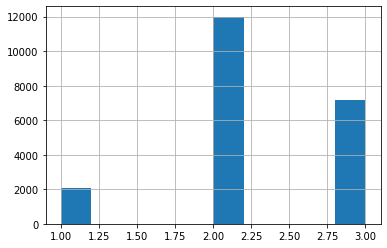

In [97]:
df['damage_grade'].hist()

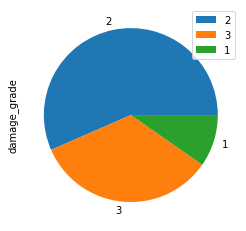

In [98]:
df['damage_grade'].value_counts().plot(kind='pie',legend=True)

# Effect of Geo_levels on Damage Grade

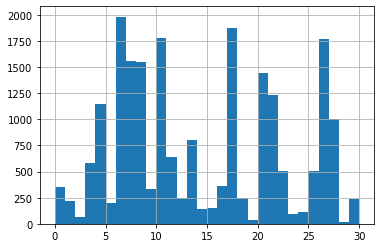

In [99]:
df['geo_level_1_id'].hist(bins=30)

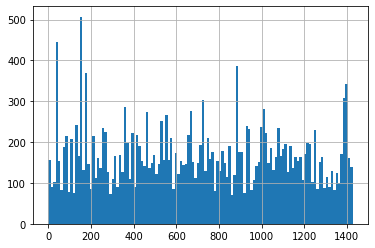

In [100]:
df['geo_level_2_id'].hist(bins=125)

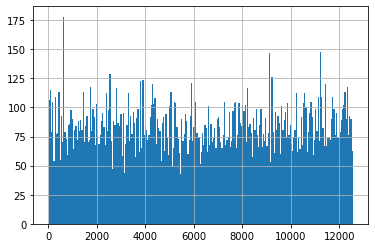

In [101]:
df['geo_level_3_id'].hist(bins=250)

# Pre-earthquake Number of floor

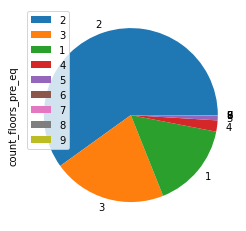

In [102]:
df['count_floors_pre_eq'].value_counts().plot(kind='pie',legend=True)

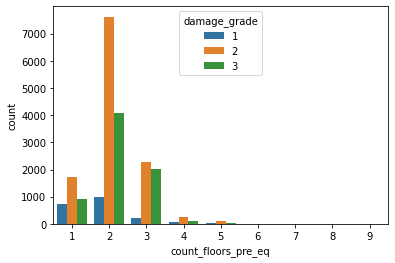

In [103]:
sbs.countplot(data=df,x='count_floors_pre_eq',hue='damage_grade')

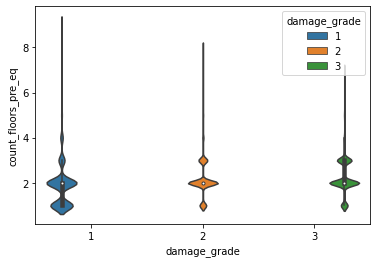

In [104]:
sbs.violinplot(data=df,x='damage_grade',y='count_floors_pre_eq',hue='damage_grade')

# Effect of Age

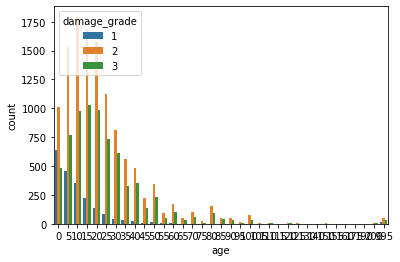

In [105]:
sbs.countplot(data=df,x='age',hue='damage_grade')

# Effect of number of floor and building height

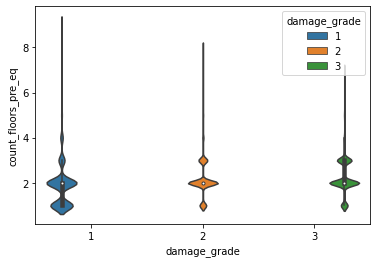

In [106]:
sbs.violinplot(data=df,x='damage_grade',y='count_floors_pre_eq',hue='damage_grade')

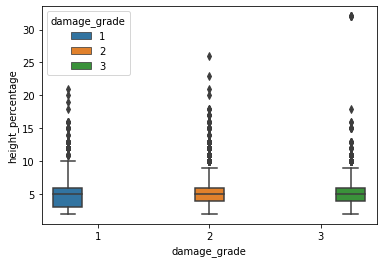

In [107]:
sbs.boxplot(data=df,x='damage_grade',y='height_percentage',hue='damage_grade')

# Effect of Roof Type and Floor Type

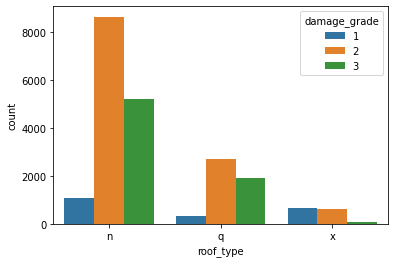

In [108]:
sbs.countplot(data=df,x='roof_type',hue='damage_grade')

# Looking for relationship between building use type and damage grade

In [109]:
a1=["has_secondary_use","has_secondary_use_agriculture",
          "has_secondary_use_hotel","has_secondary_use_rental","has_secondary_use_institution","has_secondary_use_school","has_secondary_use_industry",
          "has_secondary_use_health_post","has_secondary_use_gov_office","has_secondary_use_use_police","has_secondary_use_other"]

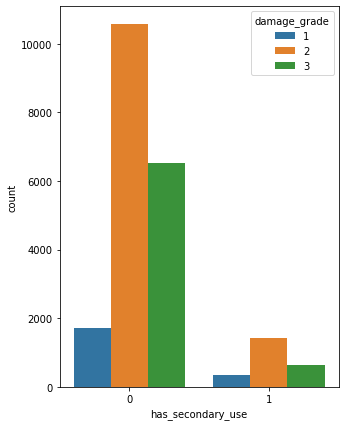

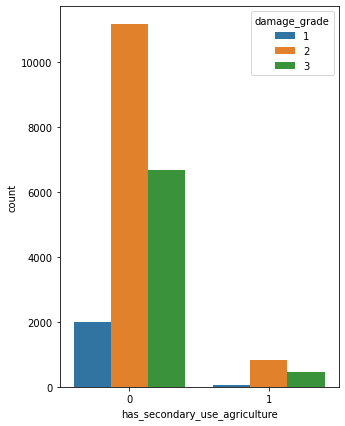

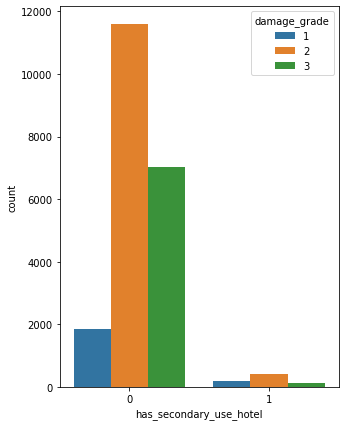

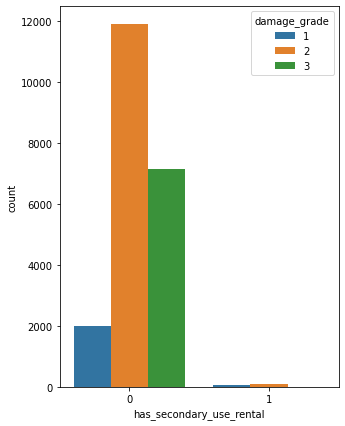

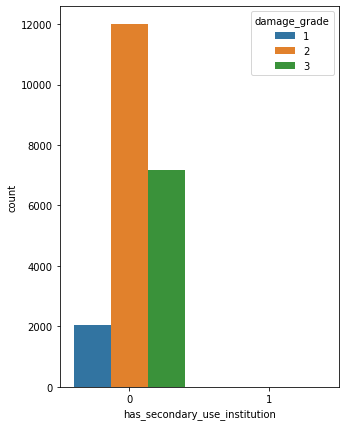

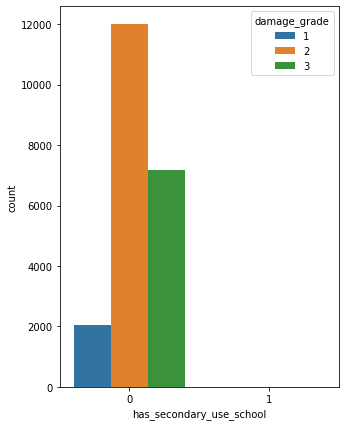

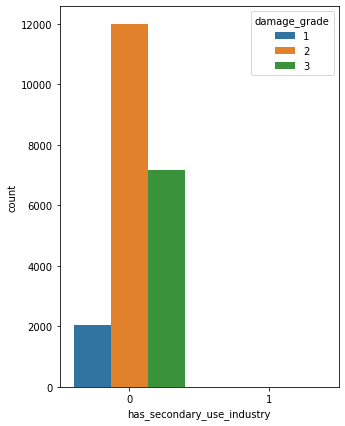

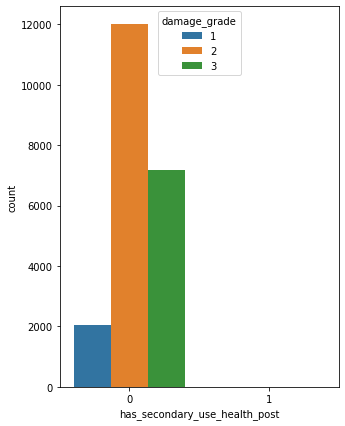

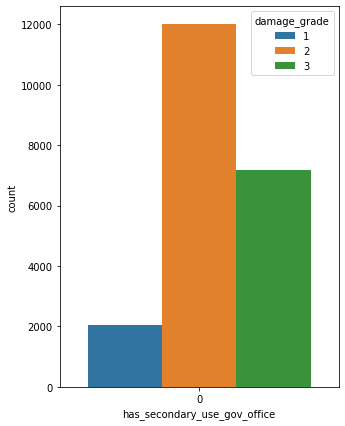

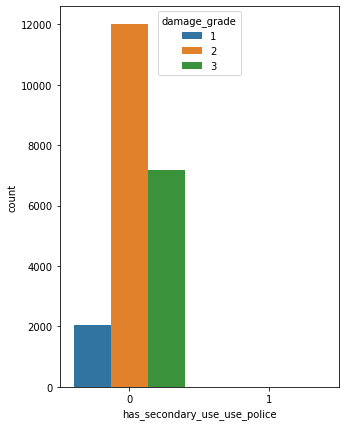

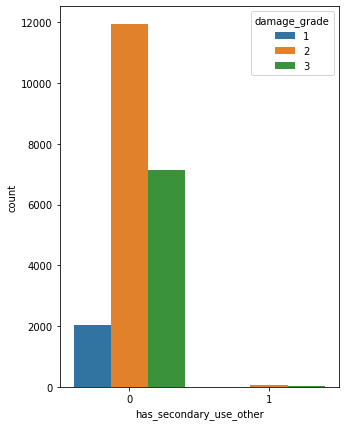

In [110]:
for i in a1:
    plt.figure(figsize=(5,7))
    sbs.countplot(data=df,x=i,hue='damage_grade')
    plt.show()

# Understanding correlation between data

## Reason for selecting Kendall Correlation coefficient
### The given data is mostly categorical. Also, Kendall and Spearman performs better with categorical data. Also, monotonic relation can be observed using Kendall Correlation but cannot be observed with Pearson. Reason for choosing Kendall over Spearman is because Spearman coefficient does not perform when the data has outlier.

In [111]:
df.corr(method='kendall')

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,1.000000,-0.003487,0.001714,-0.004202,0.014966,0.003917,-0.003372,0.009971,-0.002888,0.001021,...,-0.002128,0.002646,0.004306,-0.001235,0.006459,-0.000327,NaN,0.002794,0.004722,0.003328
geo_level_1_id,-0.003487,1.000000,-0.045692,0.004808,-0.069736,-0.046810,0.027806,-0.056867,-0.004775,-0.108478,...,0.004813,0.007940,0.001074,-0.002418,0.001657,-0.005832,NaN,-0.006340,-0.015716,-0.023572
geo_level_2_id,0.001714,-0.045692,1.000000,0.001915,0.025528,0.022832,-0.012756,0.020149,0.004453,0.067875,...,-0.007529,-0.009734,-0.002891,-0.009488,0.000551,-0.005162,NaN,0.002541,-0.007871,0.032185
geo_level_3_id,-0.004202,0.004808,0.001915,1.000000,-0.009310,0.005782,0.004233,-0.014218,-0.011978,0.023142,...,-0.007385,-0.002949,-0.009687,-0.000074,-0.014869,-0.000333,NaN,-0.005114,-0.008588,0.007782
count_floors_pre_eq,0.014966,-0.069736,0.025528,-0.009310,1.000000,0.218279,0.105930,0.688438,0.139800,0.031768,...,0.044333,0.022913,0.006536,0.007662,0.002183,0.012126,NaN,0.011906,-0.000693,0.126339
age,0.003917,-0.046810,0.022832,0.005782,0.218279,1.000000,-0.017742,0.153292,0.160383,0.103065,...,-0.057564,-0.032753,-0.009339,-0.009853,-0.004377,-0.009912,NaN,-0.001934,0.006183,0.148667
area_percentage,-0.003372,0.027806,-0.012756,0.004233,0.105930,-0.017742,1.000000,0.164917,0.029431,-0.155067,...,0.104658,0.070549,0.032009,0.018840,0.018222,0.009140,NaN,0.009491,0.017356,-0.091335
height_percentage,0.009971,-0.056867,0.020149,-0.014218,0.688438,0.153292,0.164917,1.000000,0.131884,-0.041332,...,0.070592,0.039910,0.010794,0.008791,0.003478,0.011425,NaN,0.010448,0.006169,0.059609
has_superstructure_adobe_mud,-0.002888,-0.004775,0.004453,-0.011978,0.139800,0.160383,0.029431,0.131884,1.000000,-0.308711,...,-0.011864,-0.001293,-0.004300,0.004849,-0.004987,-0.003646,NaN,-0.003646,-0.008077,0.040155
has_superstructure_mud_mortar_stone,0.001021,-0.108478,0.067875,0.023142,0.031768,0.103065,-0.155067,-0.041332,-0.308711,1.000000,...,-0.166288,-0.113161,-0.021165,-0.030127,-0.025356,-0.011988,NaN,-0.002674,-0.001326,0.275813


In [112]:
k1=df.corr(method='kendall')['damage_grade']
k1=pd.DataFrame(k1)

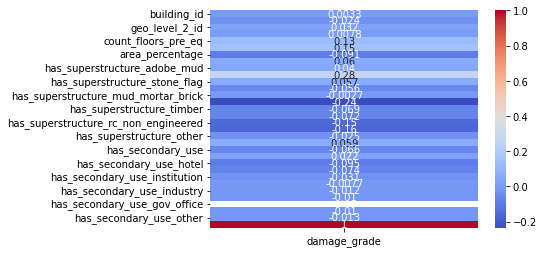

In [113]:
sbs.heatmap(k1,cmap='coolwarm',annot=True)

# Feature Engineering and Feature Selection

### Droping the unneccessary features which are not needed during training and testing ML model

In [114]:
df_x=df.drop(columns=['building_id','damage_grade','has_secondary_use_gov_office'])
df_y=df['damage_grade']
df_x

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21208,1,273,6292,2,30,10,4,t,r,n,...,0,0,0,0,0,0,0,0,0,0
21209,0,462,10579,1,0,3,3,n,r,n,...,0,0,0,0,0,0,0,0,0,0
21210,18,1317,11887,2,0,8,5,t,h,n,...,1,0,1,0,0,0,0,0,0,0
21211,8,1415,9041,3,20,4,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0


# Using label Encoder to converts label to integers

In [115]:
from sklearn.preprocessing import LabelEncoder
for column in df_x.columns:
    if df_x[column].dtype==type(object):
        le=LabelEncoder()
        df_x[column]=le.fit_transform(df_x[column])

df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21208,713033,1,273,6292,2,30,10,4,t,r,...,0,0,0,0,0,0,0,0,0,2
21209,666570,0,462,10579,1,0,3,3,n,r,...,0,0,0,0,0,0,0,0,0,2
21210,734723,18,1317,11887,2,0,8,5,t,h,...,1,0,0,0,0,0,0,0,0,2
21211,631045,8,1415,9041,3,20,4,6,t,r,...,0,0,0,0,0,0,0,0,0,2


### Splitting the training and test data
###### Doing so to avoid data leakage when using scaling technique

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.25,stratify=df_y,random_state=33)

**Applying SMOTE to create a balanced data set**

In [117]:
'''
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=13)
x_train, y_train = sm.fit_resample(x_train, y_train)
'''

'\nfrom imblearn.over_sampling import SMOTE\nsm = SMOTE(random_state=13)\nx_train, y_train = sm.fit_resample(x_train, y_train)\n'

**Reason for not using SMOTE**
- It is used when dataset is unbalanced. Using it generally, improves performance that did not happen in with our dataset because high dimensionality of our dataset.
- Smote does not works well there is high dimensionality.
- So, we tried but later discarded the Smote because it was decreasing the accuracy instead of increasing it.

In [118]:
#len(x_train)

### Applying Robust Scaler Because the data has outliers

In [119]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [120]:
import statsmodels.api as sm
import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# Random Forest

In [121]:
from sklearn.metrics import accuracy_score

In [122]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
sklearn.metrics.accuracy_score(RF.predict(x_test), y_test)

0.6809954751131222

In [123]:
RF = RandomForestClassifier()
RF.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>

In [124]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [24,36,48],
    'max_features': [20,30],
    'min_samples_leaf': [6,12],
    'min_samples_split': [4,6],
    'n_estimators': [50,75]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [125]:
%%time
grid_search.fit(x_train, y_train)
grid_search.best_params_
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
RandomForestClassifier(max_depth=24, max_features=30, min_samples_leaf=6,
                       min_samples_split=4, n_estimators=75)
CPU times: user 7.49 s, sys: 604 ms, total: 8.09 s
Wall time: 6min 54s


In [126]:
train_accuracy = sklearn.metrics.accuracy_score(best_grid.predict(x_train),y_train) 
print('train_accuracy',train_accuracy)


train_accuracy 0.8314161795210259


In [127]:
grid_accuracy = sklearn.metrics.accuracy_score(best_grid.predict(x_test),y_test) 
print('test_accuracy',grid_accuracy)


test_accuracy 0.7002262443438914


# Kneighbors

In [128]:
KN =  KNeighborsClassifier()
KN.fit(x_train,y_train)
k=sklearn.metrics.accuracy_score(KN.predict(x_test), y_test)
print('accuracy',k)

accuracy 0.5740950226244343


# Gradient Boost

In [129]:
%%time
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
sklearn.metrics.accuracy_score(GBC.predict(x_test), y_test)

CPU times: user 8.25 s, sys: 52.9 ms, total: 8.31 s
Wall time: 9.21 s


In [130]:
import numpy as np
parameters = {
    "loss":["deviance"],
    "learning_rate": [ 0.1,0.15],
    "max_depth":[5,10],
    "max_features":[35],
    "subsample":[1.0,10],
    "n_estimators":[113]
    }
GBC = GradientBoostingClassifier()

In [131]:
grid_search_GBC = GridSearchCV(GradientBoostingClassifier(),param_grid=parameters, scoring = 'accuracy')

In [132]:
import warnings
warnings.filterwarnings('ignore')
grid_search_GBC.fit(x_train, y_train)
grid_search_GBC.best_params_

{'learning_rate': 0.15,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': 35,
 'n_estimators': 113,
 'subsample': 1.0}

In [133]:
best_grid_GBC = grid_search_GBC.best_estimator_
print(best_grid_GBC)

GradientBoostingClassifier(learning_rate=0.15, max_depth=5, max_features=35,
                           n_estimators=113)


In [134]:
train_accuracy = sklearn.metrics.accuracy_score(best_grid_GBC.predict(x_test),y_test) 
print('train_accuracy',train_accuracy)


train_accuracy 0.6868401206636501


In [135]:
test_accuracy = sklearn.metrics.accuracy_score(best_grid_GBC.predict(x_test),y_test) 
print('test_accuracy',test_accuracy)


test_accuracy 0.6868401206636501


# Ada Boost

In [136]:
%%time
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
print(sklearn.metrics.accuracy_score(ABC.predict(x_test), y_test))

0.6434766214177979
CPU times: user 879 ms, sys: 9.99 ms, total: 889 ms
Wall time: 892 ms


In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [73,111]
             }


DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'accuracy')


In [138]:
import warnings
warnings.filterwarnings('ignore')
grid_search_ABC.fit(x_train, y_train)
grid_search_ABC.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'best',
 'n_estimators': 111}

In [139]:
best_grid_ABC = grid_search_ABC.best_estimator_
print(best_grid_ABC)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_features='auto',
                                                         random_state=11),
                   n_estimators=111)


In [140]:
train_accuracy = sklearn.metrics.accuracy_score(best_grid_ABC.predict(x_train),y_train) 
print('train_accuracy',train_accuracy)

train_accuracy 0.9985542774530141


In [141]:
test_accuracy = sklearn.metrics.accuracy_score(best_grid_ABC.predict(x_test),y_test) 
print('test_accuracy',test_accuracy)


test_accuracy 0.646870286576169


# Bagging Classifier

In [142]:
%%time
BC= BaggingClassifier()
BC.fit(x_train,y_train)
sklearn.metrics.accuracy_score(BC.predict(x_test), y_test)

CPU times: user 831 ms, sys: 2 ms, total: 833 ms
Wall time: 827 ms


In [143]:
bc_params = {"base_estimator__max_depth": [5,10],
          "base_estimator__min_samples_leaf": [5,7],
          "base_estimator__min_samples_split": [3,5],
          'bootstrap_features': [False, True],
          'max_features': [35],
          'max_samples': [10000],
          'n_estimators': [35],
}

DTC = DecisionTreeClassifier()

BC = BaggingClassifier(base_estimator = DTC)

grid_search_BC = GridSearchCV(BC,param_grid=bc_params, scoring = 'accuracy')

In [144]:
import warnings
warnings.filterwarnings('ignore')
grid_search_BC.fit(x_train, y_train)
grid_search_BC.best_params_

{'base_estimator__max_depth': 10,
 'base_estimator__min_samples_leaf': 5,
 'base_estimator__min_samples_split': 3,
 'bootstrap_features': False,
 'max_features': 35,
 'max_samples': 10000,
 'n_estimators': 35}

In [145]:
best_grid_BC = grid_search_BC.best_estimator_
print(best_grid_BC)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_leaf=5,
                                                        min_samples_split=3),
                  max_features=35, max_samples=10000, n_estimators=35)


In [146]:
train_accuracy = sklearn.metrics.accuracy_score(best_grid_BC.predict(x_train),y_train) 
print('train_accuracy',train_accuracy)


train_accuracy 0.7317870387830787


In [147]:
test_accuracy = sklearn.metrics.accuracy_score(best_grid_BC.predict(x_test),y_test) 
print('test_accuracy',test_accuracy)


test_accuracy 0.6923076923076923


# Ensemble

In [148]:
!pip install mlens
from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer

from sklearn.metrics import accuracy_score


In [149]:
RF=RandomForestClassifier(max_depth=24, max_features=20, min_samples_leaf=6,min_samples_split=4, n_estimators=50)
BC = BaggingClassifier()
GBC = GradientBoostingClassifier(n_estimators = 27,random_state=555)
ensemble = SuperLearner(scorer=accuracy_score, random_state=555, verbose=1)
ensemble.add([ABC,BC,RF])
ensemble.add_meta(GradientBoostingClassifier())

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...6613170>)],
   n_jobs=-1, name='group-3', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function accuracy_score at 0x7ff056613170>, shuffle=False,
       verbose=1)

In [150]:
%%time
ensemble.fit(x_train, y_train)


Fitting 2 layers
Fit complete                        | 00:00:20
CPU times: user 18.5 s, sys: 249 ms, total: 18.7 s
Wall time: 20.3 s


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...6613170>)],
   n_jobs=-1, name='group-3', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function accuracy_score at 0x7ff056613170>, shuffle=False,
       verbose=1)

In [151]:
#pred_vals = ensemble.predict(X_test)
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble.predict(x_train), y_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble.predict(x_test), y_test))


Predicting 2 layers
Predict complete                    | 00:00:01
Accuracy - Train :  0.8624049280281602

Predicting 2 layers
Predict complete                    | 00:00:01
Accuracy - Test :  0.6990950226244343


In [152]:
from sklearn.metrics import f1_score
f1_score(y_test,ensemble.predict(x_test) , average='micro')


Predicting 2 layers
Predict complete                    | 00:00:01


0.6990950226244343

In [153]:
accuracy_score(y_test,ensemble.predict(x_test))


Predicting 2 layers
Predict complete                    | 00:00:01


0.6990950226244343